In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
# import the data
df = pd.read_csv('../input/cars-brand-prediction/cars.csv')
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [3]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

We can see that there are no null values in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


We have our target varaible in a categorical format, we will convert it into numerical format using Labelencoder.

In [5]:
le = LabelEncoder()

In [6]:
df['brand'] = le.fit_transform(df['brand'])
df['brand']

0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int64

Now we will convert our data into dependent and independent variables.

In [7]:
X = df.drop(['brand'],axis=1)
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980
257,36.1,4,91,60,1800,16,1979
258,22.0,6,232,112,2835,15,1983
259,18.0,6,232,100,3288,16,1972


In [8]:
Y = df['brand']
Y

0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int64

Now we will convert our data into training and testing data.

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

In [10]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((182, 7), (79, 7), (182,), (79,))

Now we will perform a Decision tree Algorithm.

In [11]:
dt = DecisionTreeClassifier()

In [12]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

We will check the importance of our features by checking feature importance,we will then select only important features.

In [13]:
features=pd.DataFrame({'Features':train_x.columns,'Importance':np.round(dt.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

In [14]:
features

,Features,Importance
2,cubicinches,0.508
4,weightlbs,0.131
6,year,0.101
5,time-to-60,0.096
3,hp,0.095
0,mpg,0.068
1,cylinders,0.000


We can see that the cylinders feature is not at all important to us , so we will drop that feature.

In [15]:
X = X.drop(['cylinders'], axis=1)
X

,mpg,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,350,165,4209,12,1972
1,31.9,89,71,1925,14,1980
2,17.0,302,140,3449,11,1971
3,15.0,400,150,3761,10,1971
4,30.5,98,63,2051,17,1978
...,...,...,...,...,...,...
256,17.0,305,130,3840,15,1980
257,36.1,91,60,1800,16,1979
258,22.0,232,112,2835,15,1983
259,18.0,232,100,3288,16,1972


In [16]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

In [17]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((182, 6), (79, 6), (182,), (79,))

In [18]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [19]:
y_pred = dt.predict(test_x)
y_pred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2])

In [20]:
results = pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
results

,Actual,Predicted
26,1,1
54,2,2
49,2,2
92,2,2
216,1,2
...,...,...
198,0,0
179,1,2
184,2,1
209,1,1


In [21]:
dt.score(test_x,test_y)

0.7468354430379747

In [22]:
accuracy_score(test_y,y_pred)

0.7468354430379747

We will now visualise how this decision tree works.

In [40]:
from sklearn.tree import export_graphviz
#Saving the dot file as it requires additional dependencies
#This file can be converted into png or jpg using any online converters for business analysis
# graph_data=open('graph.dot','w')
graph_dot = export_graphviz(dt,filled=True,special_characters=True,
                feature_names=list(train_x.columns),class_names=list(le.classes_),rounded=True)
# graph_data.close()

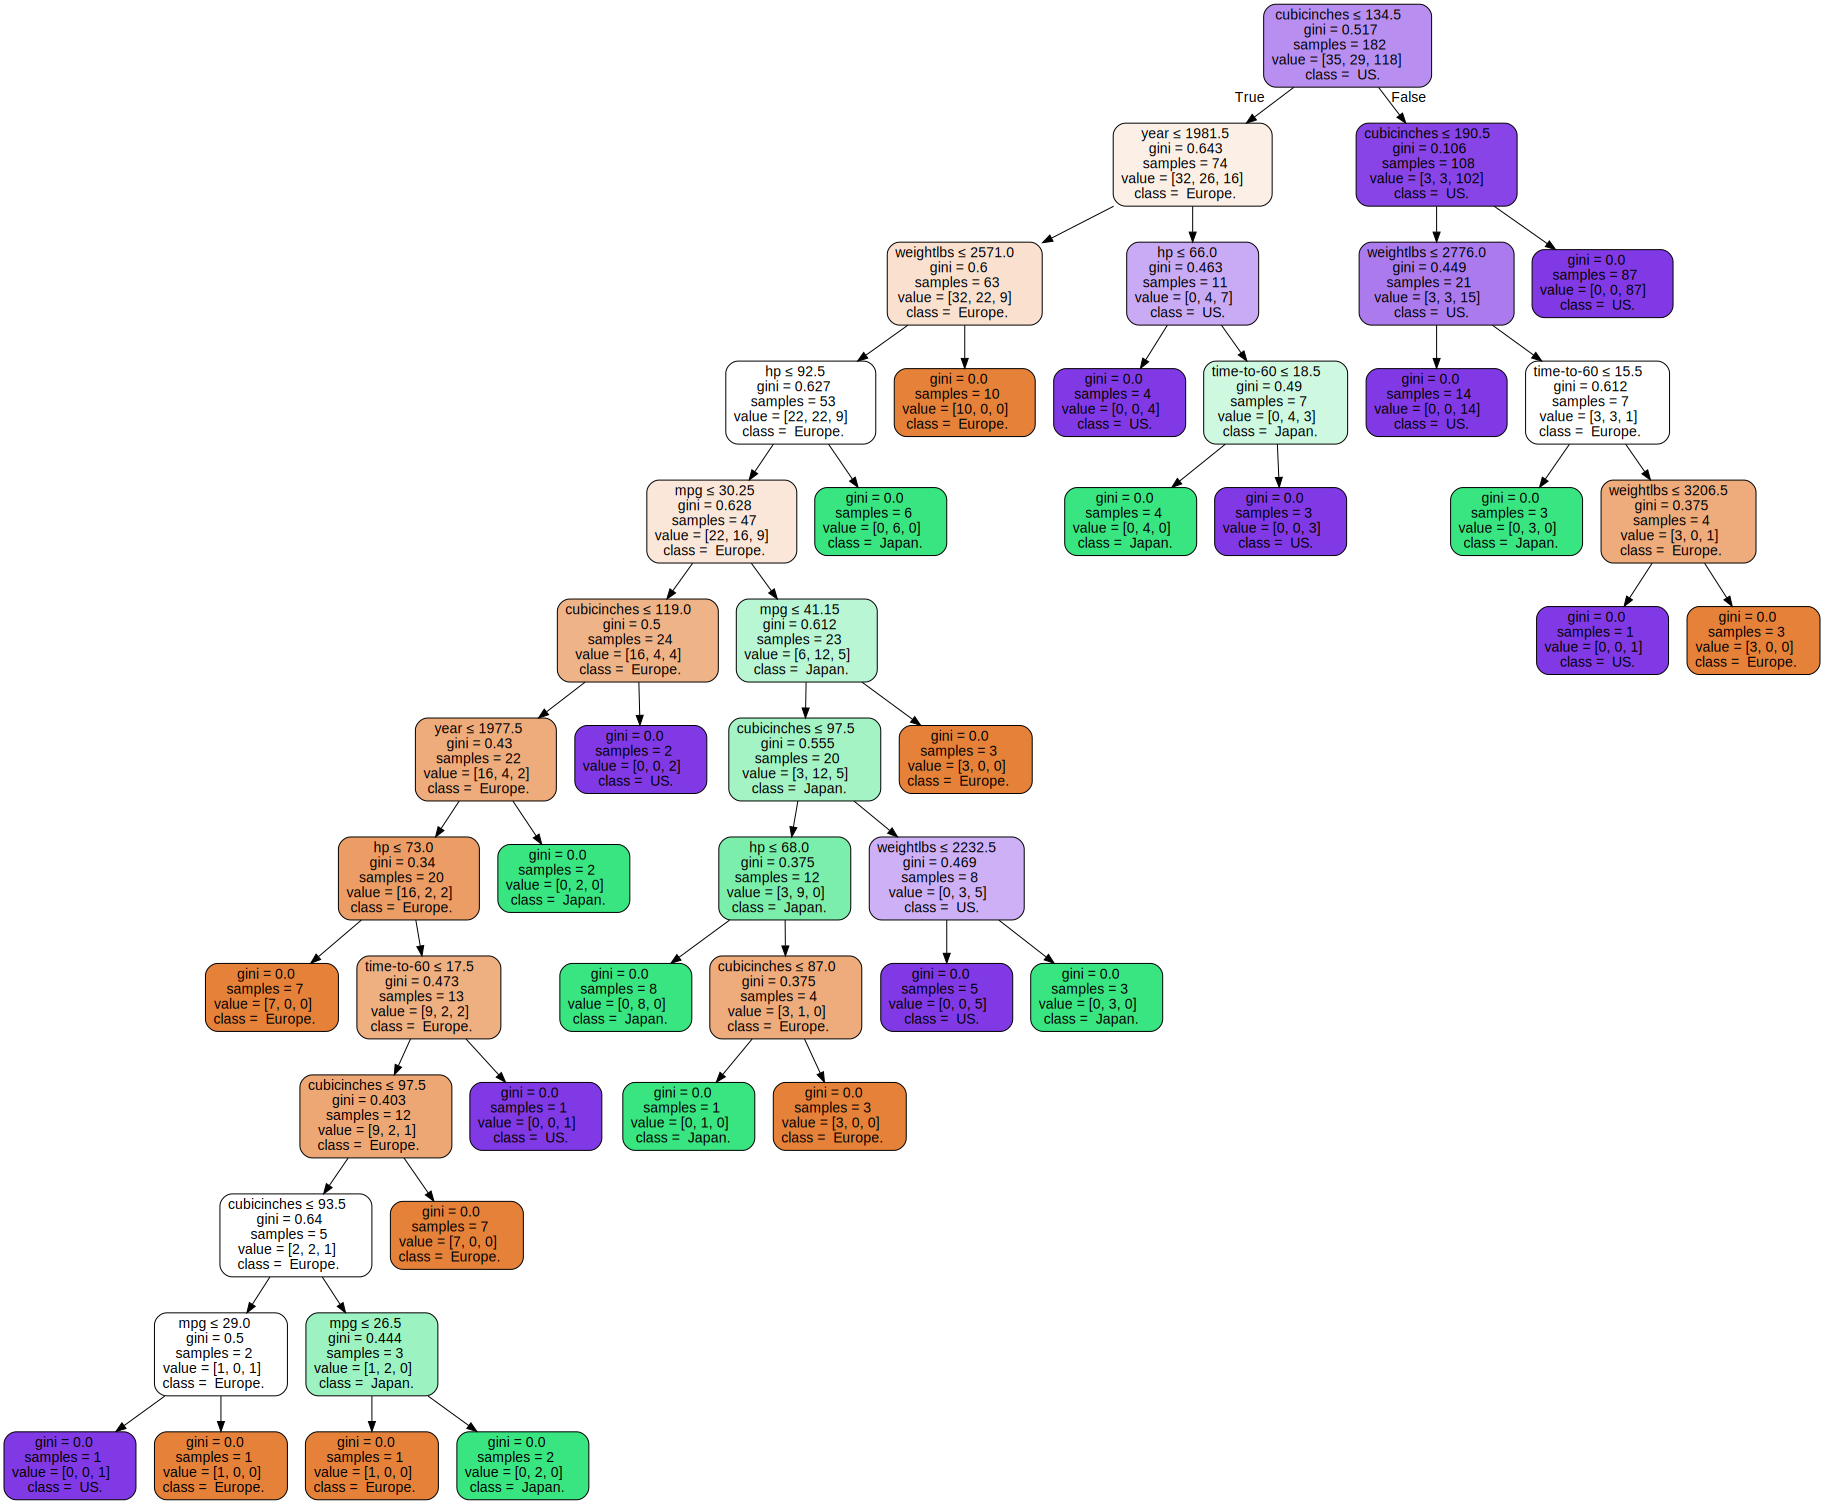

<Figure size 576x432 with 0 Axes>

In [44]:
plt.figure(figsize=(8,6))
import graphviz
graph = graphviz.Source(graph_dot)
graph

[Text(807.3191489361702, 1045.3846153846155, 'cubicinches <= 134.5\ngini = 0.517\nsamples = 182\nvalue = [35, 29, 118]\nclass =  US.'),
 Text(641.1063829787234, 961.7538461538462, 'year <= 1981.5\ngini = 0.643\nsamples = 74\nvalue = [32, 26, 16]\nclass =  Europe.'),
 Text(546.1276595744681, 878.123076923077, 'weightlbs <= 2571.0\ngini = 0.6\nsamples = 63\nvalue = [32, 22, 9]\nclass =  Europe.'),
 Text(498.63829787234044, 794.4923076923078, 'hp <= 92.5\ngini = 0.627\nsamples = 53\nvalue = [22, 22, 9]\nclass =  Europe.'),
 Text(451.1489361702128, 710.8615384615384, 'mpg <= 30.25\ngini = 0.628\nsamples = 47\nvalue = [22, 16, 9]\nclass =  Europe.'),
 Text(332.4255319148936, 627.2307692307693, 'cubicinches <= 119.0\ngini = 0.5\nsamples = 24\nvalue = [16, 4, 4]\nclass =  Europe.'),
 Text(284.93617021276594, 543.6, 'year <= 1977.5\ngini = 0.43\nsamples = 22\nvalue = [16, 4, 2]\nclass =  Europe.'),
 Text(237.4468085106383, 459.96923076923076, 'hp <= 73.0\ngini = 0.34\nsamples = 20\nvalue = [16

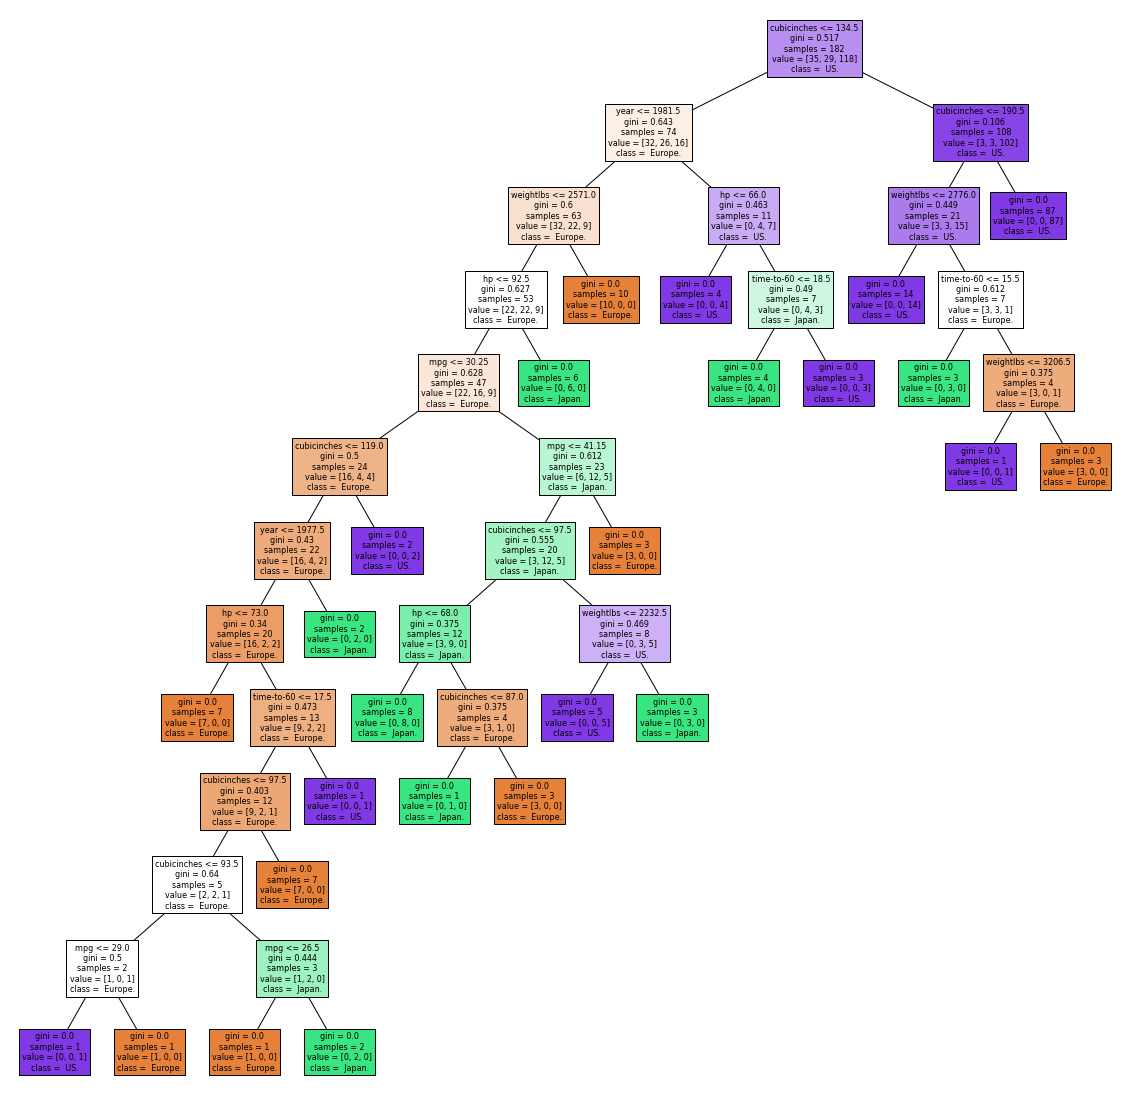

In [33]:
plt.figure(figsize=(20,20))

from sklearn import tree

tree.plot_tree(dt, feature_names=train_x.columns, class_names=le.classes_, filled=True)